### EDA of New Dataset Pre-Augmentation

#### File Set-up

In [2]:
import image_transformation_functions as transf_func
import os
import pandas as pd
import numpy as np
from PIL import Image, ImageDraw, ImageOps
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

In [3]:
# set directory of labels and image width & height
labels_directory = "C:/Users/jamie/Python Projects/Dissertation/Task/datasets/WSP-9 No augmentation/all labels/"
image_width = 640
image_height = 640

In [4]:
# save all bbox widths
all_class_labels = []
all_centre_x = []
all_centre_y = []
all_widths = []
all_heights = []
file_name_dict = {}
for file_name in os.listdir(labels_directory):
    file_class_labels, file_bbox_coords = transf_func.save_labels_coords_from_file(f"{labels_directory}{file_name}")
    file_name_dict[file_name] = file_bbox_coords
    centre_x = [coord[0]*image_width for coord in file_bbox_coords]
    centre_y = [-coord[1]*image_height for coord in file_bbox_coords]
    bbox_width = [coord[2]*image_width for coord in file_bbox_coords]
    bbox_height = [coord[3]*image_height for coord in file_bbox_coords]
    all_class_labels.append(file_class_labels)
    all_centre_x.append(centre_x)
    all_centre_y.append(centre_y)
    all_widths.append(bbox_width)
    all_heights.append(bbox_height)

In [8]:
# unpack lists
unpacked_class_labels = [label for list in all_class_labels for label in list]
unpacked_centre_x = [x for list in all_centre_x for x in list]
unpacked_centre_y = [y for list in all_centre_y for y in list]
unpacked_widths = [width for list in all_widths for width in list]
unpacked_heights = [height for list in all_heights for height in list]

In [9]:
# merge unpacked lists
merged_lists = list(zip(unpacked_class_labels, unpacked_centre_x, unpacked_centre_y, unpacked_widths, unpacked_heights))
merged_lists[0]

(5, 204.0, -304.5, 62.5, 139.0)

In [12]:
# create DataFrame for analysis, add bbox area column
bbox_df = pd.DataFrame(merged_lists, columns=["class_label", "centre_x", "centre_y", "width", "height"])
bbox_df["bbox_area"] = bbox_df["width"] * bbox_df["height"]

# rename class labels as vehicle types
class_names_dict = {0:'Articulated', 1:'Bus', 2:'Car', 3:'Coach', 4:'LGV', 5:'Rigid 2 Axle', 6:'Rigid 3 Axle', 7:'Rigid 4 Axle', 8:'Taxi'}
bbox_df["class_label"].replace(class_names_dict, inplace=True)

bbox_df

,class_label,centre_x,centre_y,width,height,bbox_area
0,Rigid 2 Axle,204.0,-304.5,62.5,139.0,8687.50
1,LGV,319.5,-422.5,79.0,128.0,10112.00
2,Taxi,184.5,-514.5,93.5,185.0,17297.50
3,LGV,252.5,-201.5,37.0,47.5,1757.50
4,Taxi,176.5,-184.5,22.5,31.0,697.50
...,...,...,...,...,...,...
10344,Bus,593.0,-533.5,94.0,208.5,19599.00
10345,Bus,188.5,-164.0,35.0,69.0,2415.00
10346,Bus,515.0,-289.5,109.5,77.5,8486.25
10347,Taxi,163.5,-545.0,112.0,115.5,12936.00


#### Size of New Dataset

In [21]:
# number of original images
len(os.listdir(labels_directory))

1802

In [22]:
# number of annotated vehicles
len(bbox_df)

10349

#### Bounding Box Locations

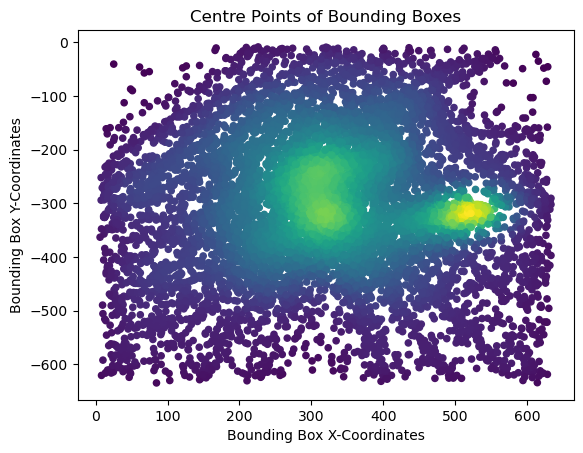

In [25]:
# draw density scatterplot of centre points
xy = np.vstack([bbox_df["centre_x"],bbox_df["centre_y"]])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(bbox_df["centre_x"], bbox_df["centre_y"], c=z, s=20)
plt.xlabel("Bounding Box X-Coordinates")
plt.ylabel("Bounding Box Y-Coordinates")
plt.title("Centre Points of Bounding Boxes")
plt.savefig("C:/Users/jamie/Python Projects/Dissertation/Task/EDA Code/Expanded Dataset Charts/density_plot_bbox_centrepoints.png", bbox_inches="tight")
plt.show()

#### Bounding Box Size

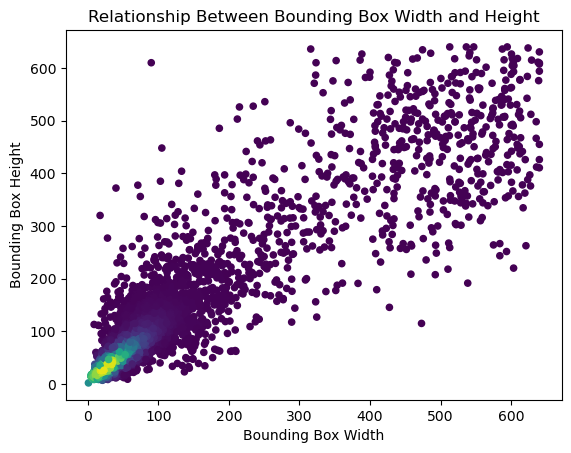

In [27]:
# draw density scatterplot of width and height
xy = np.vstack([bbox_df["width"],bbox_df["height"]])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(bbox_df["width"], bbox_df["height"], c=z, s=20)
plt.xlabel("Bounding Box Width")
plt.ylabel("Bounding Box Height")
plt.title("Relationship Between Bounding Box Width and Height")
plt.savefig("C:/Users/jamie/Python Projects/Dissertation/Task/EDA Code/Expanded Dataset Charts/density_plot_bboxes_width_height.png", bbox_inches="tight")
plt.show()

C:\Users\jamie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


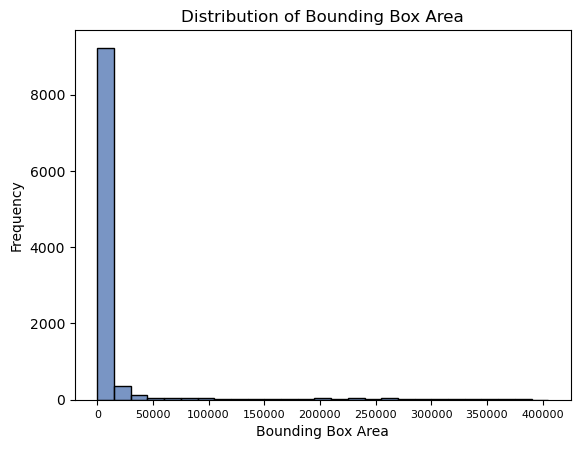

In [29]:
# histogram of bounding box size
sns.set_palette("deep")
fig = sns.histplot(data=bbox_df, x="bbox_area", binwidth=15000)
fig.set_xlabel("Bounding Box Area")
fig.tick_params(axis='x', labelsize=8)
fig.locator_params(axis='x', nbins=10)
fig.set_ylabel("Frequency")
fig.set_title("Distribution of Bounding Box Area")
plt.savefig("C:/Users/jamie/Python Projects/Dissertation/Task/EDA Code/Expanded Dataset Charts/bbox_area_distribution.png", bbox_inches="tight")
plt.show()

### Investigate Bounding Box Size
- Find the largest bounding boxes and return the image names

In [31]:
# summary statistics for bbox area/size
bbox_df["bbox_area"].describe()

count     10349.000000
mean      14574.455382
std       48948.186524
min           2.000000
25%         623.500000
50%        1488.000000
75%        4437.500000
max      403520.000000
Name: bbox_area, dtype: float64

In [33]:
# sort by bbox size in descending order - 22 listed as augmentations mean training images appear 21 times
bbox_df.sort_values(by=["bbox_area"], ascending=False).head(22)

,class_label,centre_x,centre_y,width,height,bbox_area
9828,LGV,320.0,-318.0,640.0,630.5,403520.00
9787,Rigid 2 Axle,326.0,-321.0,624.0,638.0,398112.00
9814,Rigid 2 Axle,320.0,-312.5,640.0,609.5,390080.00
2399,Bus,320.0,-334.5,638.0,611.0,389818.00
4785,Coach,320.0,-312.5,640.0,607.5,388800.00
8435,Articulated,325.0,-332.5,629.0,615.0,386835.00
8424,Rigid 2 Axle,310.5,-320.0,594.5,640.0,380480.00
8458,Rigid 2 Axle,320.0,-298.5,640.0,594.0,380160.00
3934,Bus,315.5,-309.0,609.0,618.0,376362.00
8415,Rigid 2 Axle,339.5,-326.5,600.5,626.5,376213.25


Search for the images containing the largest bounding boxes

In [37]:
# find non-rounded value of centre_x for largest bounding box
bbox_df.loc[9828, "centre_x"]

320.0

In [39]:
# find non-rounded value of centre_x for second-largest bounding box
bbox_df.loc[9787, "centre_x"]

326.0

In [45]:
# search file_name dictionary for the file name that matches the coordinates for largest bbox
for name, values in file_name_dict.items():
    for value in values:
        if value[0] == 320.0/640 and value[1] == 318.0/640:
            print(name)

van102_jpeg.rf.92cf3ced0ddec095a12a055e929557bd.txt


In [43]:
# search file_name dictionary for the file name that matches the coordinates for second-largest bbox
for name, values in file_name_dict.items():
    for value in values:
        if value[0] == 326.0/640 and value[1] == 321.0/640:
            print(name)

truck16_jpeg.rf.787621b9f7f879289234fce6ea6e427a.txt


Largest bounding boxes are for single-vehicle images where vehicle takes up most of the frame.

In [47]:
# how many boxes are larger than the mean?
bbox_df[bbox_df["bbox_area"] >= bbox_df["bbox_area"].mean()]

,class_label,centre_x,centre_y,width,height,bbox_area
2,Taxi,184.5,-514.5,93.5,185.0,17297.50
34,Bus,198.5,-399.0,95.0,241.5,22942.50
41,Bus,502.5,-500.5,170.0,276.5,47005.00
48,Bus,105.5,-485.5,211.0,307.0,64777.00
56,LGV,425.5,-350.5,138.5,209.5,29015.75
...,...,...,...,...,...,...
10341,Rigid 2 Axle,385.0,-385.0,125.0,156.0,19500.00
10342,Rigid 2 Axle,246.0,-334.5,138.0,224.0,30912.00
10343,Bus,311.5,-272.0,128.0,186.0,23808.00
10344,Bus,593.0,-533.5,94.0,208.5,19599.00


In [49]:
# boxes smaller than the mean
bbox_df[bbox_df["bbox_area"] < bbox_df["bbox_area"].mean()]

,class_label,centre_x,centre_y,width,height,bbox_area
0,Rigid 2 Axle,204.0,-304.5,62.5,139.0,8687.50
1,LGV,319.5,-422.5,79.0,128.0,10112.00
3,LGV,252.5,-201.5,37.0,47.5,1757.50
4,Taxi,176.5,-184.5,22.5,31.0,697.50
5,Taxi,282.5,-164.5,24.5,34.0,833.00
...,...,...,...,...,...,...
10339,Coach,522.0,-318.5,97.0,148.0,14356.00
10340,Coach,440.5,-190.0,29.5,46.5,1371.75
10345,Bus,188.5,-164.0,35.0,69.0,2415.00
10346,Bus,515.0,-289.5,109.5,77.5,8486.25


In [51]:
# calculate ratio of large to small boxes
total_boxes = len(bbox_df)
small_perc = round((len(bbox_df[bbox_df["bbox_area"] < bbox_df["bbox_area"].mean()]) / total_boxes)*100)
large_perc = round((len(bbox_df[bbox_df["bbox_area"] >= bbox_df["bbox_area"].mean()]) / total_boxes)*100)
print(f"Small bounding boxes comprise {small_perc}% of the total boxes")
print(f"Large bounding boxes comprise {large_perc}% of the total boxes")

Small bounding boxes comprise 89% of the total boxes
Large bounding boxes comprise 11% of the total boxes


##### 89% of bounding boxes are smaller than the mean, 11% are larger than the mean.

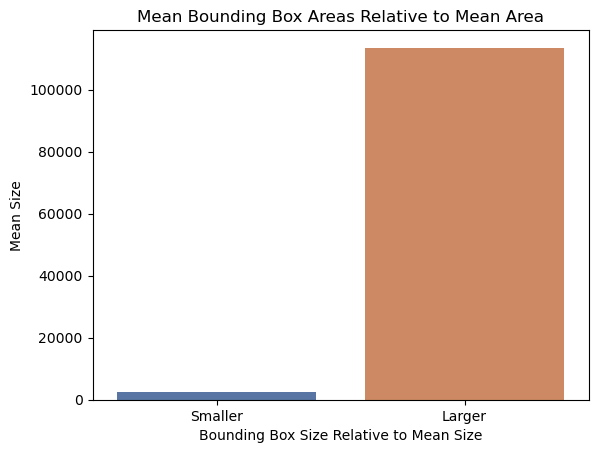

In [53]:
# barplot of average size of boxes larger and smaller than the mean size
mean_area_df = pd.DataFrame([["Smaller",bbox_df[bbox_df["bbox_area"] <= bbox_df["bbox_area"].mean()]["bbox_area"].mean()],
                             ["Larger",bbox_df[bbox_df["bbox_area"] >= bbox_df["bbox_area"].mean()]["bbox_area"].mean()]],
                           columns=["rel_to_mean_area", "mean_area"])

sns.set_palette("deep")
fig = sns.barplot(x=mean_area_df["rel_to_mean_area"], y=mean_area_df["mean_area"])
fig.set_xlabel("Bounding Box Size Relative to Mean Size")
fig.set_ylabel("Mean Size")
fig.set_title("Mean Bounding Box Areas Relative to Mean Area")
# plt.savefig("C:/Users/jamie/Python Projects/Dissertation/Task/EDA Code/Expanded Dataset Charts/mean_box_area_relative_to_mean.png", bbox_inches="tight")
plt.show()

### Balance of Object Size
- Set threshold for small objects and explore dataset balance between small and larger objects

In [55]:
# set 0.1% area threshold
box_area_threshold = (image_width*image_height)*0.001

# df of boxes smaller than threshold
threshold_bbox_df = bbox_df[bbox_df["bbox_area"] <= box_area_threshold].reset_index(drop=True)

# df of boxes larger than threshold
threshold_greater_bbox_df = bbox_df[bbox_df["bbox_area"] >= box_area_threshold].reset_index(drop=True)

In [56]:
# number of each vehicle type under small object threshold
threshold_bbox_freq = threshold_bbox_df["class_label"].value_counts().reset_index(name='Frequency').rename(columns={'class_label':'Vehicle Type'})
# add rigid 3 axle as no examples under small object threshold
threshold_bbox_freq = pd.concat([threshold_bbox_freq, pd.DataFrame([{"Vehicle Type": "Rigid 3 Axle","Frequency": 0}])], ignore_index=True)
threshold_bbox_freq

,Vehicle Type,Frequency
0,Car,1162
1,LGV,221
2,Rigid 2 Axle,59
3,Articulated,28
4,Rigid 4 Axle,21
5,Taxi,5
6,Bus,2
7,Coach,1
8,Rigid 3 Axle,0


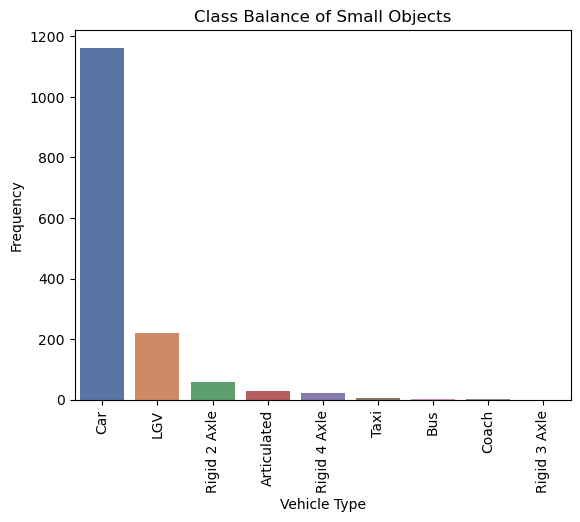

In [59]:
# bar plot of small object vehicles
sns.set_palette("deep")
ax = sns.barplot(x=threshold_bbox_freq["Vehicle Type"], y=threshold_bbox_freq["Frequency"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title("Class Balance of Small Objects")
plt.savefig("C:/Users/jamie/Python Projects/Dissertation/Task/EDA Code/Expanded Dataset Charts/class_balance_small_objects.png", bbox_inches="tight")
plt.show()

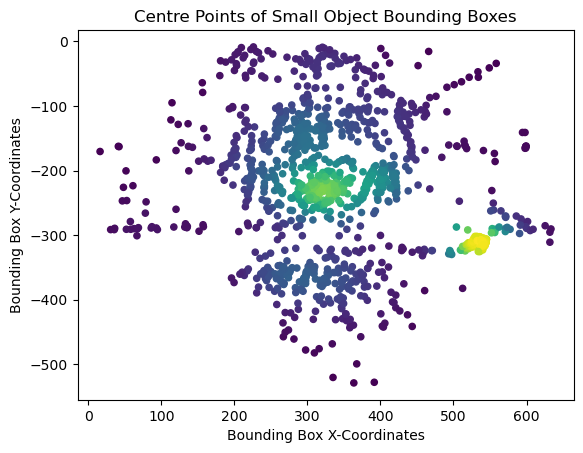

In [61]:
# chart showing small object bbox locations
xy_small = np.vstack([threshold_bbox_df["centre_x"],threshold_bbox_df["centre_y"]])
z_small = gaussian_kde(xy_small)(xy_small)

fig, ax = plt.subplots()
ax.scatter(threshold_bbox_df["centre_x"], threshold_bbox_df["centre_y"], c=z_small, s=20)
plt.xlabel("Bounding Box X-Coordinates")
plt.ylabel("Bounding Box Y-Coordinates")
plt.title("Centre Points of Small Object Bounding Boxes")
plt.savefig("C:/Users/jamie/Python Projects/Dissertation/Task/EDA Code/Expanded Dataset Charts/density_plot_small_object_centrepoints.png", bbox_inches="tight")
plt.show()

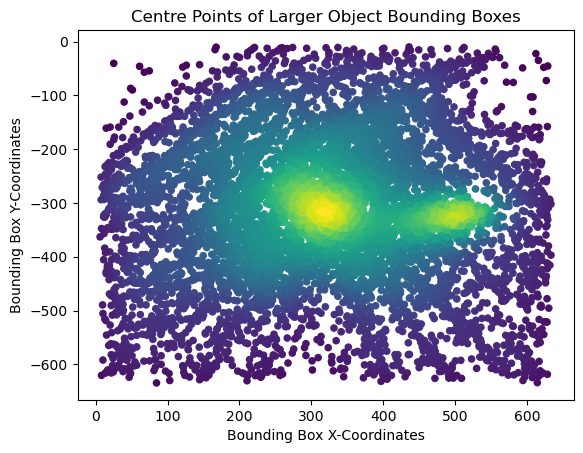

In [63]:
# chart showing larger object bbox locations
xy_larger = np.vstack([threshold_greater_bbox_df["centre_x"],threshold_greater_bbox_df["centre_y"]])
z_larger = gaussian_kde(xy_larger)(xy_larger)

fig, ax = plt.subplots()
ax.scatter(threshold_greater_bbox_df["centre_x"], threshold_greater_bbox_df["centre_y"], c=z_larger, s=20)
plt.xlabel("Bounding Box X-Coordinates")
plt.ylabel("Bounding Box Y-Coordinates")
plt.title("Centre Points of Larger Object Bounding Boxes")
plt.savefig("C:/Users/jamie/Python Projects/Dissertation/Task/EDA Code/Expanded Dataset Charts/density_plot_larger_object_centrepoints.png", bbox_inches="tight")
plt.show()

### Bounding Box Size By Class

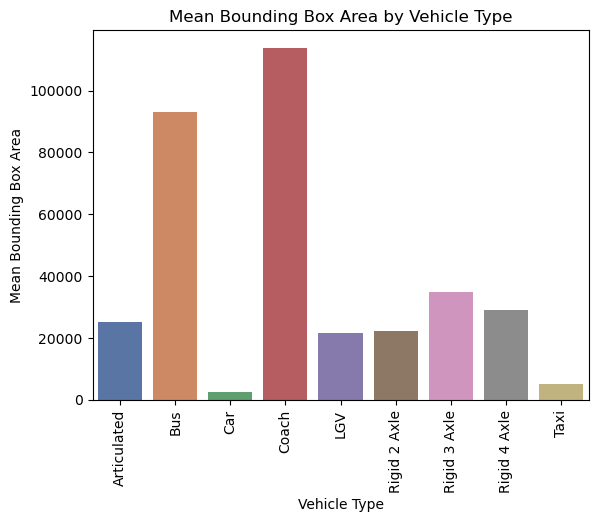

In [65]:
# mean bounding size by vehicle type
sns.set_palette("deep")
class_mean_df = bbox_df.groupby("class_label").mean().reset_index()
fig = sns.barplot(x=class_mean_df["class_label"], y=class_mean_df["bbox_area"])
fig.set_xlabel("Vehicle Type")
fig.set_ylabel("Mean Bounding Box Area")
fig.set_title("Mean Bounding Box Area by Vehicle Type")
fig.set_xticklabels(class_mean_df["class_label"], rotation=90)
plt.savefig("C:/Users/jamie/Python Projects/Dissertation/Task/EDA Code/Expanded Dataset Charts/bbox_area_by_vehicle_type.png", bbox_inches="tight")
plt.show()

### Bounding Box Locations By Vehicle Type

In [67]:
# variables for drawing density plots of bbox location by class
# articulated
xy0 = np.vstack([bbox_df[bbox_df["class_label"]=="Articulated"]["centre_x"],bbox_df[bbox_df["class_label"]=="Articulated"]["centre_y"]])
z0 = gaussian_kde(xy0)(xy0)

# bus
xy1 = np.vstack([bbox_df[bbox_df["class_label"]=="Bus"]["centre_x"],bbox_df[bbox_df["class_label"]=="Bus"]["centre_y"]])
z1 = gaussian_kde(xy1)(xy1)

# car
xy2 = np.vstack([bbox_df[bbox_df["class_label"]=="Car"]["centre_x"],bbox_df[bbox_df["class_label"]=="Car"]["centre_y"]])
z2 = gaussian_kde(xy2)(xy2)

# coach
xy3 = np.vstack([bbox_df[bbox_df["class_label"]=="Coach"]["centre_x"],bbox_df[bbox_df["class_label"]=="Coach"]["centre_y"]])
z3 = gaussian_kde(xy3)(xy3)

# lgv
xy4 = np.vstack([bbox_df[bbox_df["class_label"]=="LGV"]["centre_x"],bbox_df[bbox_df["class_label"]=="LGV"]["centre_y"]])
z4 = gaussian_kde(xy4)(xy4)

# rigid 2 axle
xy5 = np.vstack([bbox_df[bbox_df["class_label"]=="Rigid 2 Axle"]["centre_x"],bbox_df[bbox_df["class_label"]=="Rigid 2 Axle"]["centre_y"]])
z5 = gaussian_kde(xy5)(xy5)

# rigid 3 axle
xy6 = np.vstack([bbox_df[bbox_df["class_label"]=="Rigid 3 Axle"]["centre_x"],bbox_df[bbox_df["class_label"]=="Rigid 3 Axle"]["centre_y"]])
z6 = gaussian_kde(xy6)(xy6)

# rigid 4 axle
xy7 = np.vstack([bbox_df[bbox_df["class_label"]=="Rigid 4 Axle"]["centre_x"],bbox_df[bbox_df["class_label"]=="Rigid 4 Axle"]["centre_y"]])
z7 = gaussian_kde(xy7)(xy7)

# taxi
xy8 = np.vstack([bbox_df[bbox_df["class_label"]=="Taxi"]["centre_x"],bbox_df[bbox_df["class_label"]=="Taxi"]["centre_y"]])
z8 = gaussian_kde(xy8)(xy8)

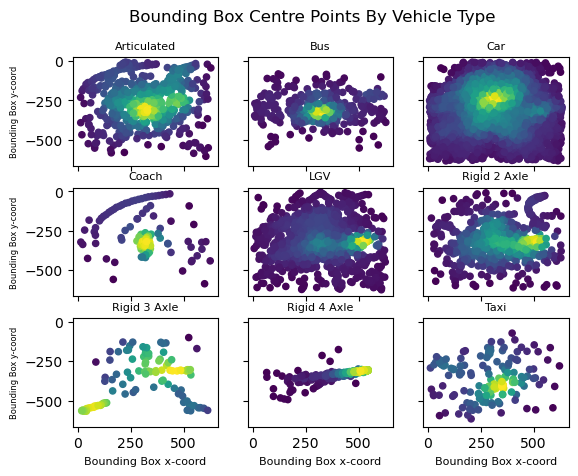

In [69]:
# bbox locations by vehicle type
fig, axs = plt.subplots(3,3, sharex=True, sharey=True)

# articulated
axs[0,0].scatter(bbox_df[bbox_df["class_label"]=="Articulated"]["centre_x"], bbox_df[bbox_df["class_label"]=="Articulated"]["centre_y"], c=z0, s=20)
axs[0,0].set_title("Articulated", fontsize=8)
# bus
axs[0,1].scatter(bbox_df[bbox_df["class_label"]=="Bus"]["centre_x"], bbox_df[bbox_df["class_label"]=="Bus"]["centre_y"], c=z1, s=20)
axs[0,1].set_title("Bus", fontsize=8)
# car
axs[0,2].scatter(bbox_df[bbox_df["class_label"]=="Car"]["centre_x"], bbox_df[bbox_df["class_label"]=="Car"]["centre_y"], c=z2, s=20)
axs[0,2].set_title("Car", fontsize=8)
# coach
axs[1,0].scatter(bbox_df[bbox_df["class_label"]=="Coach"]["centre_x"], bbox_df[bbox_df["class_label"]=="Coach"]["centre_y"], c=z3, s=20)
axs[1,0].set_title("Coach", fontsize=8)
# lgv
axs[1,1].scatter(bbox_df[bbox_df["class_label"]=="LGV"]["centre_x"], bbox_df[bbox_df["class_label"]=="LGV"]["centre_y"], c=z4, s=20)
axs[1,1].set_title("LGV", fontsize=8)
# rigid 2 axle
axs[1,2].scatter(bbox_df[bbox_df["class_label"]=="Rigid 2 Axle"]["centre_x"], bbox_df[bbox_df["class_label"]=="Rigid 2 Axle"]["centre_y"], c=z5, s=20)
axs[1,2].set_title("Rigid 2 Axle", fontsize=8)
# rigid 3 axle
axs[2,0].scatter(bbox_df[bbox_df["class_label"]=="Rigid 3 Axle"]["centre_x"], bbox_df[bbox_df["class_label"]=="Rigid 3 Axle"]["centre_y"], c=z6, s=20)
axs[2,0].set_title("Rigid 3 Axle", fontsize=8)
# rigid 4 axle
axs[2,1].scatter(bbox_df[bbox_df["class_label"]=="Rigid 4 Axle"]["centre_x"], bbox_df[bbox_df["class_label"]=="Rigid 4 Axle"]["centre_y"], c=z7, s=20)
axs[2,1].set_title("Rigid 4 Axle", fontsize=8)
# taxi
# rigid 4 axle
axs[2,2].scatter(bbox_df[bbox_df["class_label"]=="Taxi"]["centre_x"], bbox_df[bbox_df["class_label"]=="Taxi"]["centre_y"], c=z8, s=20)
axs[2,2].set_title("Taxi", fontsize=8)

# set axis labels
for ax in axs.flat:
    ax.set_xlabel("Bounding Box x-coord", fontsize = 8)
    ax.set_ylabel("Bounding Box y-coord", fontsize=6)
    ax.label_outer()
    
fig.suptitle("Bounding Box Centre Points By Vehicle Type", fontsize=12)
# plt.savefig("C:/Users/jamie/Python Projects/Dissertation/Task/EDA Code/Expanded Dataset Charts/density_plot__bbox_centrepoints_by_vehicle_type.png", bbox_inches="tight")
plt.show()

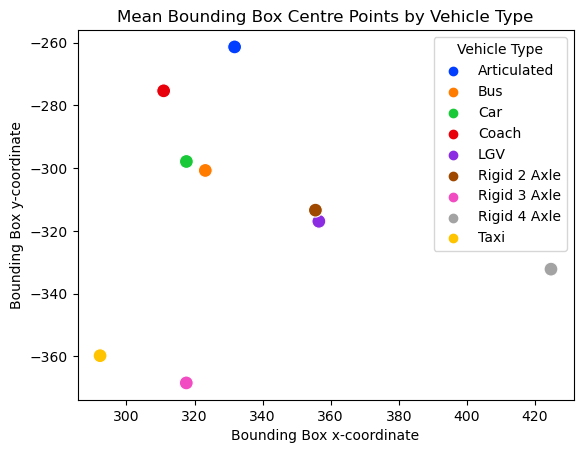

In [71]:
# mean bounding box centre point by vehicle type
sns.set_palette("bright")
fig = sns.scatterplot(data=class_mean_df, x="centre_x", y="centre_y", hue="class_label", s=100)
fig.set_xlabel("Bounding Box x-coordinate")
fig.set_ylabel("Bounding Box y-coordinate")
fig.set_title("Mean Bounding Box Centre Points by Vehicle Type")
fig.legend(title="Vehicle Type")
plt.savefig("C:/Users/jamie/Python Projects/Dissertation/Task/EDA Code/Expanded Dataset Charts/mean_bbox_centrepoints_by_vehicle_type.png", bbox_inches="tight")
plt.show()

### Number of Vehicles per Image

In [73]:
# save number of objects per image
class_labels_all_files = []
num_objects_per_file = []
for file in os.listdir(labels_directory):
    num_objects_per_file.append([file, len(transf_func.save_class_labels_from_file(f"{labels_directory}{file}"))])
    class_labels_all_files.append(transf_func.save_class_labels_from_file(f"{labels_directory}{file}"))

In [74]:
# create df of number of objects per image
image_objects_df = pd.DataFrame(num_objects_per_file, columns=["file_name", "objects_per_file"])
image_objects_df.head()

,file_name,objects_per_file
0,00001-02500_jpg.rf.55b5620801151943d816ef5ddf8...,7
1,00001-04250_jpg.rf.40ec41be92e0dc857e5235db5b7...,9
2,00001-06502_jpg.rf.7927904a9cae3768a98a70e6739...,8
3,00001-06590_jpg.rf.25e3ca249bc64eac624e0f51412...,9
4,00001-06592_jpg.rf.3c2c7e15a8c33a66942fc0ad80c...,9


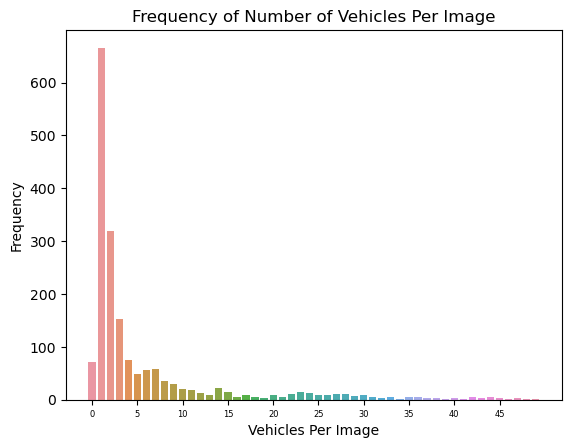

In [77]:
# bar plot number of objects per image
sns.set_palette("deep")
fig = sns.countplot(image_objects_df, x="objects_per_file")
fig.set_xlabel("Vehicles Per Image")
fig.tick_params(axis='x', labelsize=6)
fig.locator_params(axis='x', nbins=10)
fig.set_ylabel("Frequency")
fig.set_title("Frequency of Number of Vehicles Per Image")
plt.savefig("C:/Users/jamie/Python Projects/Dissertation/Task/EDA Code/Expanded Dataset Charts/frequency_number_vehicles_per_image.png", bbox_inches="tight")
plt.show()

In [79]:
# summary statistics for objects per image
image_objects_df["objects_per_file"].describe()

count    1802.000000
mean        5.743063
std         8.967027
min         0.000000
25%         1.000000
50%         2.000000
75%         6.000000
max        51.000000
Name: objects_per_file, dtype: float64

In [81]:
# find images containing most objects
image_objects_df.sort_values("objects_per_file", ascending=False)

,file_name,objects_per_file
1203,5_mp4-5_jpg.rf.2c181e1a35a8821f6211d2b178c9c1c...,51
1204,5_mp4-6_jpg.rf.5d5aee39f21f1d3e416f0e6c61177f6...,49
1578,test2_mp4-9_jpg.rf.f8418304080d93ccb34f1126f6b...,47
1195,5_mp4-24_jpg.rf.479bce7fef647ebe02d5465bdbd2be...,47
1205,5_mp4-7_jpg.rf.4a100235a7089c247809130e152e9c3...,47
...,...,...
712,23_png.rf.460b8675a51edd07a95eaf951898e064.txt,0
896,32833838_png.rf.0cac153e457fb6497c3c570748949f...,0
1400,clean_100_jpg.rf.8ab8a7d7faa03f7712862b3e21351...,0
880,323232_png.rf.c034e72cf0fcba6411c6ada2c30e0611...,0


In [83]:
# find images containing least objects
image_objects_df.sort_values("objects_per_file")

,file_name,objects_per_file
1423,clean_51_jpg.rf.dd3a0d68d2df19e286ddd13981fd59...,0
1425,clean_55_jpg.rf.5ea129fa8405005e769773c3ab8367...,0
1426,clean_57_jpg.rf.da1a561ab38ac42de83a2437634dc8...,0
1494,dirty_8_jpg.rf.d835e98d88c48635301dca00b793146...,0
181,12982872_png.rf.27e67247f4be1661eca1c011d76630...,0
...,...,...
1205,5_mp4-7_jpg.rf.4a100235a7089c247809130e152e9c3...,47
1195,5_mp4-24_jpg.rf.479bce7fef647ebe02d5465bdbd2be...,47
1578,test2_mp4-9_jpg.rf.f8418304080d93ccb34f1126f6b...,47
1204,5_mp4-6_jpg.rf.5d5aee39f21f1d3e416f0e6c61177f6...,49


### Class Balance

In [14]:
# find frequency of vehicles appearing in expanded dataset
freq_counts_df = bbox_df["class_label"].value_counts().reset_index(name='Frequency').rename(columns={'class_label':'Vehicle Type'})
freq_counts_df

,Vehicle Type,Frequency
0,Car,6323
1,LGV,1555
2,Rigid 2 Axle,770
3,Articulated,578
4,Bus,480
5,Rigid 4 Axle,238
6,Taxi,173
7,Coach,124
8,Rigid 3 Axle,108


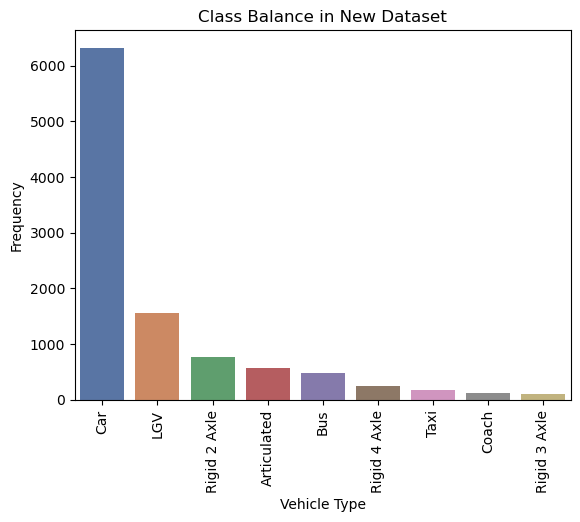

In [16]:
# bar plot of class balance
sns.set_palette("deep")
ax = sns.barplot(x=freq_counts_df["Vehicle Type"], y=freq_counts_df["Frequency"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.locator_params(axis='y', nbins=12)
ax.set_title("Class Balance in New Dataset")
plt.savefig("C:/Users/jamie/Python Projects/Dissertation/Task/EDA Code/Expanded Dataset Charts/class_balance.png", bbox_inches="tight")
plt.show()